In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


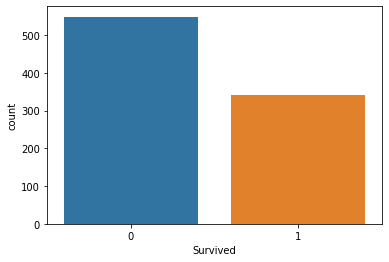

In [6]:
sns.countplot(x='Survived', data=data)

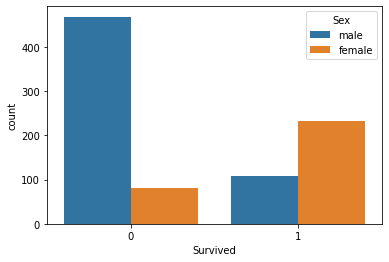

In [7]:
sns.countplot(x='Survived', hue='Sex', data=data)

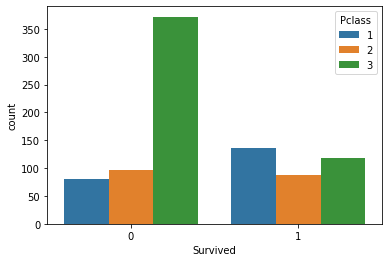

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=data)

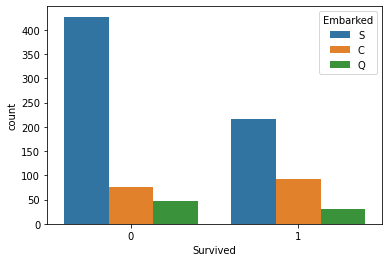

In [10]:
sns.countplot(x='Survived', hue='Embarked', data=data)

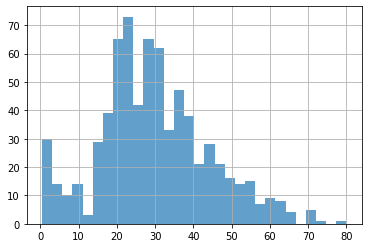

In [11]:
data['Age'].hist(bins=30, alpha=0.7)

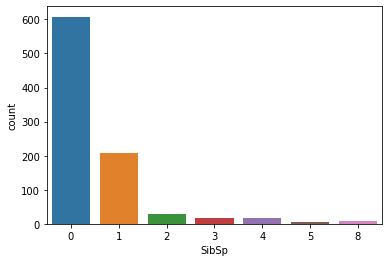

In [12]:
sns.countplot(x='SibSp', data=data)

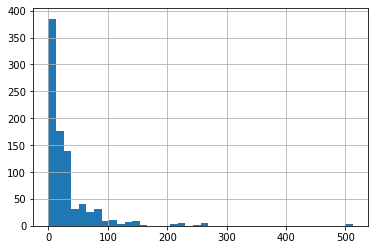

In [13]:
data['Fare'].hist(bins=40)

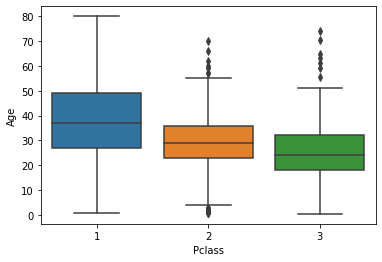

In [14]:
sns.boxplot(x='Pclass', y='Age', data=data)

In [15]:
def average_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [16]:
data['Age'] = data[['Age', 'Pclass']].apply(average_age, axis=1)

In [17]:
data.drop('Cabin', axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
sex = pd.get_dummies(data['Sex'], drop_first = True)
embarked = pd.get_dummies(data['Embarked'], drop_first = True)

In [20]:
data.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [21]:
data = pd.concat([data, sex, embarked], axis=1)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.30 )

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [28]:
predictions = lg.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       163
           1       0.80      0.65      0.72       105

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



In [45]:
test = pd.read_csv('test.csv')

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
print(test.isna().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [48]:
print(test['Age'].isna().sum())
print(test['Fare'].isna().sum())
print(test['Cabin'].isna().sum())

86
1
327


In [49]:
test['Age'] = test[['Age', 'Pclass']].apply(average_age, axis=1)

In [50]:
test.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [51]:
sex = pd.get_dummies(test['Sex'], drop_first = True)
embarked = pd.get_dummies(test['Embarked'], drop_first = True)

In [52]:
test = pd.concat([test, sex, embarked], axis=1)

In [53]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,1,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,1,0
3,895,3,male,27.0,0,0,8.6625,S,1,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,1


In [54]:
test.drop('Sex', axis=1, inplace=True)

In [61]:
test.drop('Embarked', axis=1, inplace=True)

In [63]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [64]:
import numpy as np

In [65]:
test['Fare'] = test['Fare'].replace(np.nan, int(test['Fare'].median()))

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   male         418 non-null    uint8  
 7   Q            418 non-null    uint8  
 8   S            418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [68]:
prediction = lg.predict(test)

In [69]:
result = pd.DataFrame(test['PassengerId'])

In [71]:
result['Survived'] = prediction

In [72]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [73]:
result.to_csv('prediction.csv', index=False)